In [1]:
import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
os.listdir()

['properties.txt',
 'explore.ipynb',
 'README.md',
 '.gitignore',
 '.ipynb_checkpoints',
 '.git',
 'soc-redditHyperlinks-body.tsv']

In [9]:
df = pd.read_csv('soc-redditHyperlinks-body.tsv', sep='\t')

In [10]:
df.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08..."
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049..."
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082..."
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0...."
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0...."


In [11]:
properties = []
with open('properties.txt') as fp:
    line = fp.readline()
    line = fp.readline()
    while line and len(line) > 0:
        line = fp.readline()
        properties.append(line[3:-1])
        
propsDf = df["PROPERTIES"].str.split(",", expand=True) 
for i in range(len(properties)):
    prop = properties[i]
    df[prop] = propsDf[i].astype("float64")
df.drop(columns="PROPERTIES",inplace=True)

In [12]:
df.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,Number of characters without counting white space,Fraction of alphabetical characters,Fraction of digits,Fraction of uppercase characters,Fraction of white spaces,...,LIWC_Leisure,LIWC_Home,LIWC_Money,LIWC_Relig,LIWC_Death,LIWC_Assent,LIWC_Dissent,LIWC_Nonflu,LIWC_Filler,
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,345.0,298.0,0.756522,0.017391,0.086957,...,0.068966,0.034483,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,101.0,98.0,0.742574,0.019802,0.049505,...,0.000000,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,85.0,85.0,0.752941,0.023529,0.082353,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,1124.0,949.0,0.772242,0.001779,0.057829,...,0.031250,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.005208
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,715.0,622.0,0.777622,0.006993,0.025175,...,0.016667,0.025000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.008333


In [13]:
df.columns

Index(['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT', 'POST_ID', 'TIMESTAMP',
       'LINK_SENTIMENT', 'Number of characters without counting white space',
       'Fraction of alphabetical characters', 'Fraction of digits',
       'Fraction of uppercase characters', 'Fraction of white spaces',
       'Fraction of special characters, such as comma, exclamation mark, etc.',
       'Number of words', 'Number of unique works',
       ' Number of long words (at least 6 characters)', ' Average word length',
       ' Number of unique stopwords', ' Fraction of stopwords',
       ' Number of sentences', ' Number of long sentences (at least 10 words)',
       ' Average number of characters per sentence',
       ' Average number of words per sentence', ' Automated readability index',
       ' Positive sentiment calculated by VADER',
       ' Negative sentiment calculated by VADER',
       ' Compound sentiment calculated by VADER', ' LIWC_Funct',
       ' LIWC_Pronoun', ' LIWC_Ppron', ' LIWC_I', ' LIWC_W

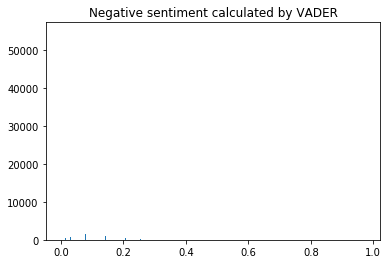

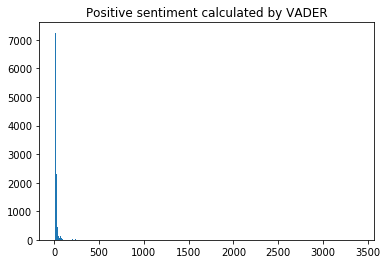

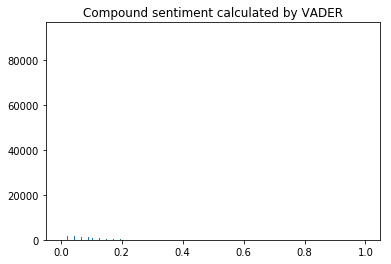

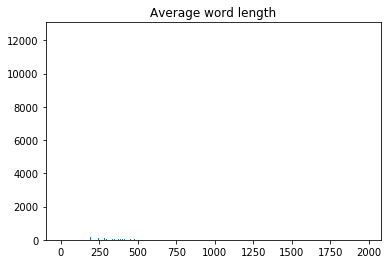

In [ ]:
hist_columns = [' Negative sentiment calculated by VADER',
                ' Positive sentiment calculated by VADER',
                ' Compound sentiment calculated by VADER',
               ' Average word length',
               'Number of words',
               'Number of unique works',
               ' Average number of characters per sentence']
filenames = ['negative_vader','positive_vader','compound_vader',
             'average_word_length','num_words','num_unique_words',
            'average_chars_per_sentence']
for i in range (len(hist_columns)):
    filename = filenames[i]
    plt.hist(df[hist_columns[i]],bins=10000)
    plt.title(hist_columns[i][1:])
    plt.savefig("plots/"+filename+".png")
    plt.show()

In [20]:
# plt.hist(df[' Positive sentiment calculated by VADER'],bins=10000)
# plt.savefig("plots/positive_vader.png")
# plt.show()

In [8]:
df['SOURCE_SUBREDDIT'].describe()

count             286561
unique             27863
top       subredditdrama
freq                4665
Name: SOURCE_SUBREDDIT, dtype: object

In [9]:
df['TARGET_SUBREDDIT'].describe()

count        286561
unique        20606
top       askreddit
freq           7329
Name: TARGET_SUBREDDIT, dtype: object

In [13]:
df['LINK_SENTIMENT'].describe()

count    286561.000000
mean          0.852946
std           0.522000
min          -1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: LINK_SENTIMENT, dtype: float64

In [14]:
G=nx.from_pandas_edgelist(df, 'SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT')

In [17]:
pageranks = nx.pagerank(G)

In [18]:
np.mean([pageranks[rank] for rank in pageranks])

2.7951699463327367e-05

In [21]:
closeness_centrality = nx.closeness_centrality(G)

KeyboardInterrupt: 

In [ ]:
degree_centrality = nx.degree_centrality(G)

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)